## Success of the attack considering the type of weapon used to do it

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Dataset**

In [6]:
data = pd.read_csv('globalterrorismdb_0718dist.csv', encoding="ISO-8859-1")

/home/laura/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
data.shape

(181691, 135)

In [51]:
data1 = data[['weaptype1_txt','success']]
data1.head(10)

,weaptype1_txt,success
0,Unknown,1
1,Unknown,1
2,Unknown,1
3,Explosives,1
4,Incendiary,1
5,Firearms,1
6,Firearms,0
7,Explosives,1
8,Incendiary,1
9,Incendiary,1


In [10]:
data1['weaptype1_txt'].unique()

array(['Unknown', 'Explosives', 'Incendiary', 'Firearms', 'Chemical',
       'Melee', 'Sabotage Equipment',
       'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)',
       'Fake Weapons', 'Radiological', 'Other', 'Biological'],
      dtype=object)

In [11]:
(data1['weaptype1_txt'] == 'Unknown').sum()

15157

In [16]:
(data1['weaptype1_txt'] == 'Explosives').sum()

92426

**Total number of attacks using that specific weapon**

In [22]:
total = data1.groupby('weaptype1_txt').count()
total

,success
weaptype1_txt,
Biological,35
Chemical,321
Explosives,92426
Fake Weapons,33
Firearms,58524
Incendiary,11135
Melee,3655
Other,114
Radiological,14


**Total number of SUCCESSFUL attacks using that specific weapon**

In [31]:
success = data1.groupby('weaptype1_txt').sum()
success

,success
weaptype1_txt,
Biological,15
Chemical,243
Explosives,79746
Fake Weapons,18
Firearms,54090
Incendiary,10472
Melee,3286
Other,90
Radiological,2


In [79]:
weapon_sorted = data1.weaptype1_txt.unique()
weapon_sorted.sort()
weapon_sorted

array(['Biological', 'Chemical', 'Explosives', 'Fake Weapons', 'Firearms',
       'Incendiary', 'Melee', 'Other', 'Radiological',
       'Sabotage Equipment', 'Unknown',
       'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)'],
      dtype=object)

**Failures**

In [81]:
fail = total.success - success.success
fail

weaptype1_txt
Biological                                                                        20
Chemical                                                                          78
Explosives                                                                     12680
Fake Weapons                                                                      15
Firearms                                                                        4434
Incendiary                                                                       663
Melee                                                                            369
Other                                                                             24
Radiological                                                                      12
Sabotage Equipment                                                                 8
Unknown                                                                         1737
Vehicle (not to include vehicle-borne explosives, i

**Successes and failure for each single type of weapon**

Text(0.5, 1.0, 'Attacks considering the type of weapon')

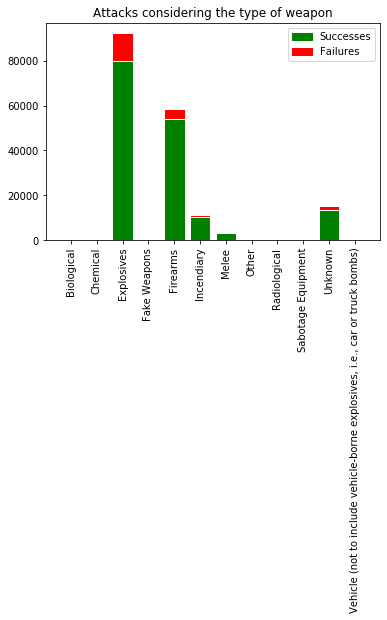

In [82]:
import matplotlib.patches as mpatches

bars1 = success.success
bars2 = fail
bars = np.add(bars1, bars2).tolist()

r = [x for x in weapon_sorted]

plt.bar(r, bars1, color='green', edgecolor='white')
plt.bar(r, bars2, bottom=bars1, color='red', edgecolor='white')

plt.xticks(r)
plt.xticks(rotation=90)

red_patch = mpatches.Patch(color='red', label='Failures')
green_patch = mpatches.Patch(color='green', label='Successes')

plt.legend(handles=[green_patch,red_patch])
plt.title("Attacks considering the type of weapon")